In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [17]:
data = loadmat('ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [18]:
X_train = np.c_[np.ones_like(data['X']), data['X']]
y_train = data['y']

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

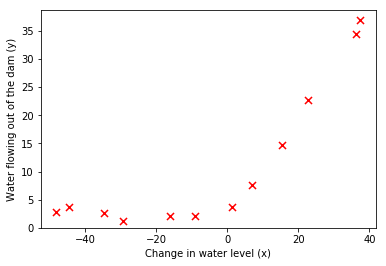

In [19]:
plt.scatter(X_train[:, 1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=0);

In [20]:
def regularisedlrcostfunc(theta, X, y, reg):
    m = y.size
    h = X.dot(theta.reshape(-1, 1))
    J = (1/(2*m))*np.sum(np.square(h - y)) + (reg/(2*m)*np.sum(np.square(theta[1:])))
    return J

In [21]:
def regularisedlrgradient(theta, X, y, reg):
    h = X.dot(theta.reshape(-1, 1))
    m = y.size
    grad = ((1/m)*X.T.dot(h - y)) + (reg/m)*np.r_[[[0]], theta[1:].reshape(-1,1)]
    return grad.flatten()

In [22]:
initial_theta = np.ones((X_train.shape[1], 1))
cost = regularisedlrcostfunc(initial_theta, X_train, y_train, 0)
gradient = regularisedlrgradient(initial_theta, X_train, y_train, 0)
print(cost)
print(gradient)

303.9515255535976
[-15.30301567 598.16741084]


In [23]:
from scipy.optimize import minimize

def trainmodel(X, y, reg):
    initial_theta = np.array([[15], [15]])
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
    res = minimize(regularisedlrcostfunc, initial_theta, args=(X,y,reg), method=None, jac=regularisedlrgradient, options={'maxiter':5000})
    return res

In [24]:
fit = trainmodel(X_train, y_train, 0)
fit

      fun: 22.373906495108905
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([ 3.42437190e-12, -5.70371898e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])

In [25]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [26]:
regr = LinearRegression(fit_intercept=False)
regr.fit(X_train, y_train.ravel())
print(regr.coef_)
print(regularisedlrcostfunc(regr.coef_, X_train, y_train, 0))

[13.08790351  0.36777923]
22.373906495108912


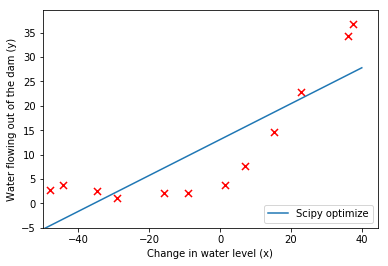

In [27]:
plt.plot(np.linspace(-50,40), (fit.x[0]+ (fit.x[1]*np.linspace(-50,40))), label='Scipy optimize')
#plt.plot(np.linspace(-50,40), (regr.coef_[0]+ (regr.coef_[1]*np.linspace(-50,40))), label='Scikit-learn')
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)
plt.legend(loc=4);

In [36]:
def learnCurve(X, y, Xval, yval, reg):
    m = y.size
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))

    for i in np.arange(m):
        res = trainmodel(X[:i+1], y[:i+1], reg)
        error_train[i] = regularisedlrcostfunc(res.x, X[:i+1], y[:i+1], reg)
        error_val[i] = regularisedlrcostfunc(res.x, Xval, yval, reg)
    return (error_train, error_val)

In [37]:
t_error, v_error = learnCurve(X_train, y_train, Xval, yval, 0)

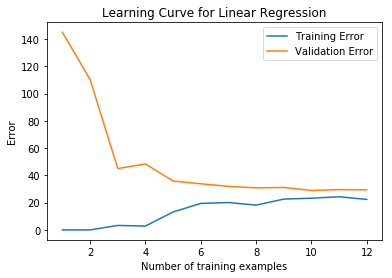

In [41]:
plt.plot(np.arange(1,13), t_error, label='Training Error')
plt.plot(np.arange(1,13), v_error, label='Validation Error')
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

Polynomial Regression (Scikit Learn)

In [ ]:
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train[:, 1].reshape(-1, 1))

regr2 = LinearRegression()
regr2.fit(X_train_poly, y_train)

regr3 = Ridge(alpha=20)
regr3.fit(X_train_poly, y_train)

# Plot range for x
plot_x = np.linspace(-60, 45)
# calculating y from coeffs
plot_y = regr2.intercept_+ np.sum(regr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plot_y2 = regr3.intercept_+np.sum(regr3.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

plt.plot(plot_x, plot_y, label='Scikit Learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit Learn Ridge (alpha={})'.format(regr3.alpha))
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam ')